<a href="https://colab.research.google.com/github/gomdoori/AI/blob/main/(%E1%84%89%E1%85%B5%E1%86%AB%E1%84%80%E1%85%A7%E1%86%BC%E1%84%86%E1%85%A1%E1%86%BC%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2)Numerical_Deeplearning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

# MNIST 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 확인
print(x_train.shape)  # 학습 데이터의 형태
print(y_train.shape)  # 학습 데이터의 레이블 형태
print(x_test.shape)   # 테스트 데이터의 형태
print(y_test.shape)   # 테스트 데이터의 레이블 형태

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


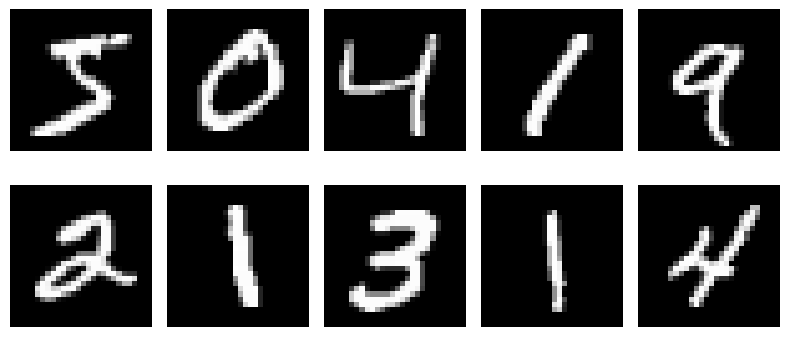

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
def get_mini_batches(x, y, batch_size):
    N = x.shape[0]  # 전체 데이터 개수
    mini_batches = []  # 미니배치를 저장할 리스트

    # 데이터를 랜덤하게 섞음
    permutation = list(np.random.permutation(N))
    shuffled_X = x[permutation]
    shuffled_Y = y[permutation]

    # 미니배치로 나누기
    num_complete_batches = N // batch_size  # 미니배치로 완전히 나눠지는 경우의 수
    for k in range(num_complete_batches):
        mini_batch_X = shuffled_X[k * batch_size: (k + 1) * batch_size]
        mini_batch_Y = shuffled_Y[k * batch_size: (k + 1) * batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # 나머지 데이터 처리
    if N % batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_batches * batch_size:]
        mini_batch_Y = shuffled_Y[num_complete_batches * batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [ ]:
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
alpha = 0.01

In [ ]:
# 3층 신경망 클래스
# ReLU 활성화 함수
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    c = np.max(x, axis=1, keepdims=True)
    exp_a = np.exp(x-c)
    sum_exp_a = np.sum(exp_a, axis=1, keepdims=True)
    y = exp_a / sum_exp_a
    return y

class Three_NN_relu:
    def __init__(self):
        # 가중치 초기화

        self.W1 = np.random.randn(784, 128)
        self.W2 = np.random.randn(128, 128)
        self.W3 = np.random.randn(128, 10)

        self.B1 = np.random.randn(1, 128)
        self.B2 = np.random.randn(1, 128)
        self.B3 = np.random.randn(1, 10)

        self.r_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.r_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.r_W3, self.v_W3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
        self.r_B1, self.v_B1 = np.zeros_like(self.B1), np.zeros_like(self.B1)
        self.r_B2, self.v_B2 = np.zeros_like(self.B2), np.zeros_like(self.B2)
        self.r_B3, self.v_B3 = np.zeros_like(self.B3), np.zeros_like(self.B3)

        self.t = 0

    def forward(self, x):
        # 순방향 전파
        self.A1 = np.dot(x, self.W1) + self.B1
        self.Z1 = relu(self.A1)
        self.A2 = np.dot(self.Z1, self.W2) + self.B2
        self.Z2 = relu(self.A2)
        self.Y_hat = np.dot(self.Z2, self.W3) + self.B3
        self.P = softmax(self.Y_hat)

        return self.P

    def backward(self, x, y):
        # 오차역전파
        self.t += 1
        N = len(x)

        deri_Loss = self.P - y
        dW3 = (1 / N) * np.dot(self.Z2.T, deri_Loss)
        db3 = (1 / N) * np.sum(deri_Loss, axis=0)

        deri_a2 = np.dot(deri_Loss, self.W3.T) * relu_derivative(self.A2)
        dW2 = (1 / N) * np.dot(self.Z1.T, deri_a2)
        db2 = (1 / N) * np.sum(deri_a2, axis=0)

        deri_a1 = np.dot(deri_a2, self.W2.T) * relu_derivative(self.A1)
        dW1 = (1 / N) * np.dot(x.T, deri_a1)
        db1 = (1 / N) * np.sum(deri_a1, axis=0)

        # 가중치 업데이트
        self.v_W3 = beta1 * self.v_W3 + (1 - beta1) * dW3
        self.r_W3 = beta2 * self.r_W3 + (1 - beta2) * (dW3 ** 2)
        v_hat_W3 = self.v_W3 / (1 - beta1 ** self.t)
        r_hat_W3 = self.r_W3 / (1 - beta2 ** self.t)
        self.W3 -= alpha * v_hat_W3 / (np.sqrt(r_hat_W3) + epsilon)

        self.v_W2 = beta1 * self.v_W2 + (1 - beta1) * dW2
        self.r_W2 = beta2 * self.r_W2 + (1 - beta2) * (dW2 ** 2)
        v_hat_W2 = self.v_W2 / (1 - beta1 ** self.t)
        r_hat_W2 = self.r_W2 / (1 - beta2 ** self.t)
        self.W2 -= alpha * v_hat_W2 / (np.sqrt(r_hat_W2) + epsilon)

        self.v_W1 = beta1 * self.v_W1 + (1 - beta1) * dW1
        self.r_W1 = beta2 * self.r_W1 + (1 - beta2) * (dW1 ** 2)
        v_hat_W1 = self.v_W1 / (1 - beta1 ** self.t)
        r_hat_W1 = self.r_W1 / (1 - beta2 ** self.t)
        self.W1 -= alpha * v_hat_W1 / (np.sqrt(r_hat_W1) + epsilon)

        self.v_B3 = beta1 * self.v_B3 + (1 - beta1) * db3
        self.r_B3 = beta2 * self.r_B3 + (1 - beta2) * (db3 ** 2)
        v_hat_B3 = self.v_B3 / (1 - beta1 ** self.t)
        r_hat_B3 = self.r_B3 / (1 - beta2 ** self.t)
        self.B3 -= alpha * v_hat_B3 / (np.sqrt(r_hat_B3) + epsilon)

        self.v_B2 = beta1 * self.v_B2 + (1 - beta1) * db2
        self.r_B2 = beta2 * self.r_B2 + (1 - beta2) * (db2 ** 2)
        v_hat_B2 = self.v_B2 / (1 - beta1 ** self.t)
        r_hat_B2 = self.r_B2 / (1 - beta2 ** self.t)
        self.B2 -= alpha * v_hat_B2 / (np.sqrt(r_hat_B2) + epsilon)

        self.v_B1 = beta1 * self.v_B1 + (1 - beta1) * db1
        self.r_B1 = beta2 * self.r_B1 + (1 - beta2) * (db1 ** 2)
        v_hat_B1 = self.v_B1 / (1 - beta1 ** self.t)
        r_hat_B1 = self.r_B1 / (1 - beta2 ** self.t)
        self.B1 -= alpha * v_hat_B1 / (np.sqrt(r_hat_B1) + epsilon)

In [ ]:
np.random.seed(0)
batch_size = 128
mini_batches = get_mini_batches(x_train, y_train, batch_size)
model_relu = Three_NN_relu()

In [ ]:
loss_record_train = []
loss_record_test = []

acc_record_train = []
acc_record_test = []

epochs = 50

for epoch in range(epochs):
    for mini_batch in mini_batches:
        mini_batch_X, mini_batch_Y = mini_batch
        mini_P = model_relu.forward(mini_batch_X)
        model_relu.backward(mini_batch_X,mini_batch_Y)

    P = model_relu.forward(x_train)
    Loss = -np.mean(y_train * np.log(P + 1e-8))
    loss_record_train.append(Loss)

    P_test = model_relu.forward(x_test)
    Loss_test = -np.mean(y_test * np.log(P_test + 1e-8))
    loss_record_test.append(Loss_test)

    real_train = np.argmax(y_train, axis=1)
    predicted_train = np.argmax(P, axis=1)
    real_test = np.argmax(y_test, axis=1)
    predicted_test = np.argmax(P_test, axis=1)

    acc_train = (predicted_train == real_train).sum()/len(y_train)
    acc_test = (predicted_test == real_test).sum()/len(y_test)

    acc_record_train.append(acc_train)
    acc_record_test.append(acc_test)

    if epoch % 1 == 0:
        print(f'Epoch {epoch} of {epochs}')
        print(f'train loss: {Loss:.8f}, test loss: {Loss_test:.8f}')

Epoch 0 of 50
train loss: 0.14262491, test loss: 0.16907246
Epoch 1 of 50
train loss: 0.09584874, test loss: 0.13421175
Epoch 2 of 50
train loss: 0.06805382, test loss: 0.10552388
Epoch 3 of 50
train loss: 0.05019530, test loss: 0.09369890
Epoch 4 of 50
train loss: 0.04532336, test loss: 0.09011562
Epoch 5 of 50
train loss: 0.03763661, test loss: 0.08455135
Epoch 6 of 50
train loss: 0.03828198, test loss: 0.08413307
Epoch 7 of 50
train loss: 0.03091830, test loss: 0.07256291
Epoch 8 of 50
train loss: 0.02950594, test loss: 0.07394358
Epoch 9 of 50
train loss: 0.02982868, test loss: 0.06976735
Epoch 10 of 50
train loss: 0.02059346, test loss: 0.06330303
Epoch 11 of 50
train loss: 0.02284059, test loss: 0.06358066
Epoch 12 of 50
train loss: 0.01878165, test loss: 0.05608217
Epoch 13 of 50
train loss: 0.02001225, test loss: 0.05390207
Epoch 14 of 50
train loss: 0.01673121, test loss: 0.05424724
Epoch 15 of 50
train loss: 0.01704458, test loss: 0.04887681
Epoch 16 of 50
train loss: 0.01512

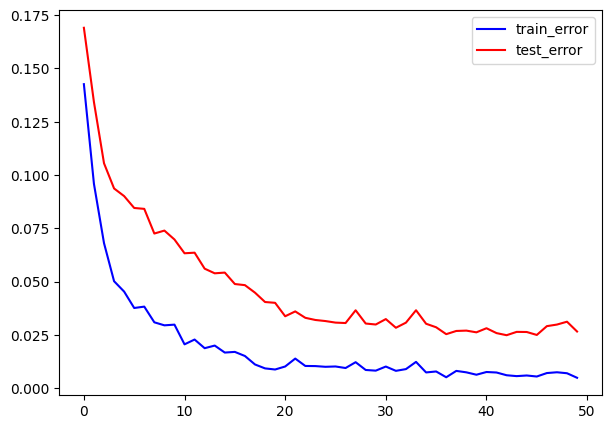

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(loss_record_train,'b',label='train_error')
plt.plot(loss_record_test,'r',label='test_error')
plt.legend()
plt.show()

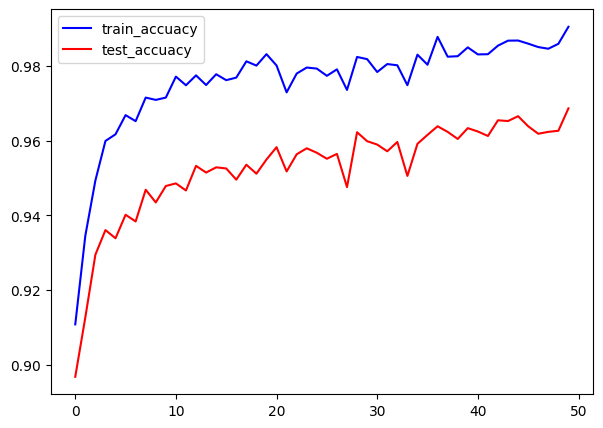

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(acc_record_train,'b',label='train_accuacy')
plt.plot(acc_record_test,'r',label='test_accuacy')
plt.legend()
plt.show()

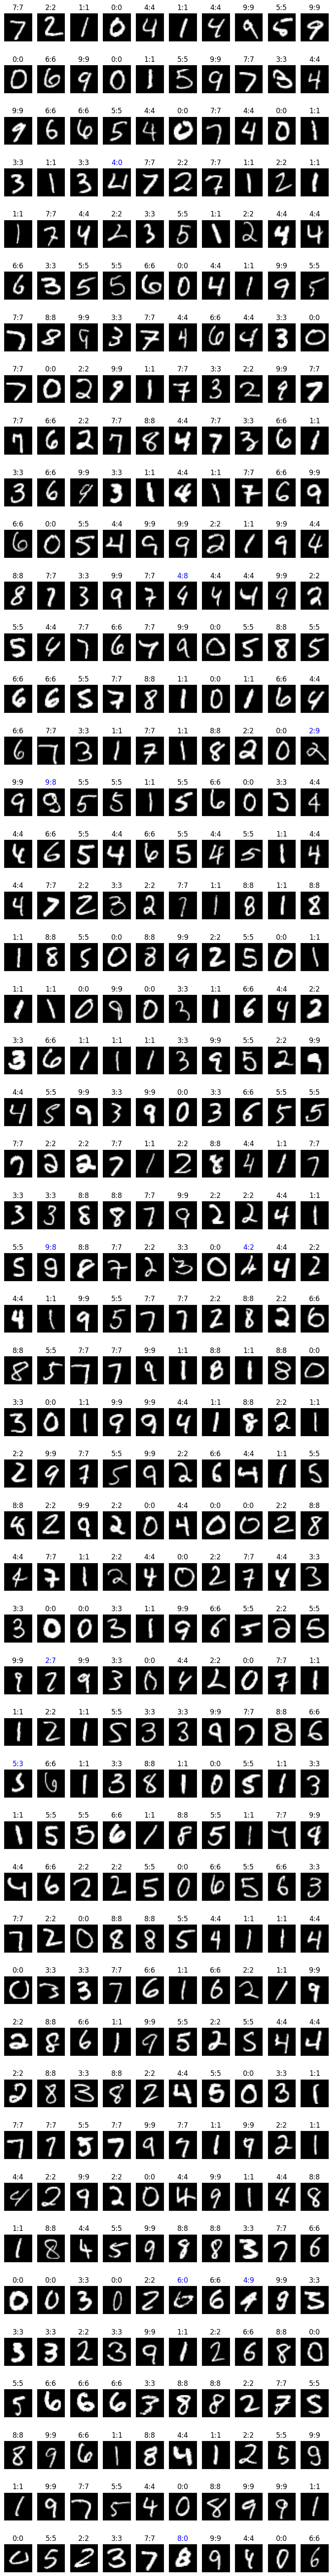

In [ ]:
# 처음 500건의 이미지에 대해 "정답:예측"으로 출력

plt.figure(figsize=(10, 80))
for i in range(500):
  ax = plt.subplot(50, 10, i + 1)

  # 넘파이 배열로 변환
  image = x_test[i]
  label = real_test[i]
  pred = predicted_test[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'

  # 이미지의 범위를 [0, 255] 로 되돌림
  image2 = 255*image

  # 이미지 출력
  plt.imshow(image2.reshape(28, 28),cmap='gray')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()